# Team Members
### Anu Reddy - anu.reddy@stud.uni-heidelberg.de
### Keerthan Ugrani - keerthan.ugrani@stud.uni-heidelberg.de
### Florain Tichawa - florian.tichawa@stud.uni-heidelberg.de

In [65]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Hand-Crafted Network
### Task 1.1: Neuron Definition
First, we create a Neuron class taking a bias, list of weights, and activation function as a base.
To demonstrate its functionality, we use the weighted average as default activation function, and run it with a simple test case.

In [66]:
class Neuron:

    def weighted_avg(values, params):
        '''
        The function weighted_avg calculates the weighted average of input values and parameters.
        Input:
        values: The input values, a numpy array
        params: The parameters of the neuron, a numpy array
        Output:
        The weighted average of input values and parameters
        '''
        return np.mean(values * params)
    
    def __init__(self, bias=0.0, params=list(), afunc=weighted_avg):
        self.bias = bias
        self.params = np.asarray(params)
        self.afunc = afunc
    
    def activate(self, inputs):
        '''
        The function activate calculates the output of the neuron for the given input values.
        Input:
        inputs: The input values, a numpy array
        Output:
        The output of the neuron
        '''
        return self.bias + self.afunc(inputs, self.params)

In [67]:
neuron = Neuron(bias=0.5, params=[0.1, 0.2, 0.3])
assert neuron.activate([3, 2, 1]) == 0.5 + (3 * 0.1 + 2 * 0.2 + 1 * 0.3) / 3
print("weighted_avg of", [3, 2, 1], "with weights", neuron.params, "and bias", neuron.bias, "is", neuron.activate([3, 2, 1]))

weighted_avg of [3, 2, 1] with weights [0.1 0.2 0.3] and bias 0.5 is 0.8333333333333333


Next, we define our three activation functions <code>logical_or</code>, <code>masked_or</code>, and <code>xnor</code> ("Perfect match") to use in our neuron.
For <code>logical_or</code>, we only need the input data. For <code>masked_or</code> and <code>xnor</code>, we use the neuron parameters as bitmasks.

To verify our implementation, we run a few simple test cases.

In [68]:
def logical_or(values, params):
    '''
    This function performs a logical OR operation on the values.
    Input:
    values: numpy array
    params: not used in this function
        This parameter is not used in this function but is included to maintain a consistent function signature.
    Output:
    bool:The result of applying the logical OR operation to the input values.
    '''
    return values.any()

def masked_or(values, params):
    '''
    This function performs a logical AND operation on each corresponding pair of elements in 'values' and 'params',
    then returns the result of applying a logical OR operation to the results of the AND operations.
    Input:
    values: numpy array
    params: numpy array
    Output:
    bool:The result of applying the masked OR operation to the input values and parameters.
    '''
    return np.logical_and(values, params).any()

def xnor(values, params):
    '''
    This function performs a logical XNOR operation on each appropriate pair of entries in the 'values' and 'params' arrays.
    If the number of 'True' inputs is even, the XNOR operation returns 'True', else it returns 'False'. 
    The inverse of the XOR operator, which returns 'True' if the number of 'True' inputs is odd.
    Input:
    values: numpy array   
    params: numpy array 
    Output:
    bool:The result of applying the XNOR operation to the input values and parameters.
    '''
    return not np.logical_xor(values, params).any()

In [69]:
list1 = np.array([0, 0, 0])
list2 = np.array([0, 0, 1])
list3 = np.array([0, 1, 1])

assert logical_or(list1, list()) == 0
print("logical_or on", list1, "is", logical_or(list1, list()))
assert logical_or(list2, list()) == 1
print("logical_or on", list2, "is", logical_or(list2, list()))
assert logical_or(list3, list()) == 1
print("logical_or on", list3, "is", logical_or(list3, list()))

assert masked_or(list2, list1) == 0
print("masked_or on", list2, "with mask", list1, "is", masked_or(list2, list1))
assert masked_or(list2, list3) == 1
print("masked_or on", list2, "with mask", list3, "is", masked_or(list2, list3))

assert xnor(list2, list3) == 0
print("xnor on", list2, "and", list1, "is", xnor(list2, list3))
assert xnor(list3, list3) == 1
print("xnor on", list3, "and", list3, "is", xnor(list3, list3))

logical_or on [0 0 0] is False
logical_or on [0 0 1] is True
logical_or on [0 1 1] is True
masked_or on [0 0 1] with mask [0 0 0] is False
masked_or on [0 0 1] with mask [0 1 1] is True
xnor on [0 0 1] and [0 0 0] is False
xnor on [0 1 1] and [0 1 1] is True


To turn these activation functions into proper neurons, we now have to create a couple of neurons using these methods.
To demonstrate their functionality, we will run the same test cases on these neurons.
For these simple cases, the bias is always zero, and the output is only determined by the input (And the mask supplied through the <code>params</code> attribute).

In [70]:
or_neuron = Neuron(afunc=logical_or)
assert or_neuron.activate(list1) == 0
print("logical_or neuron on", list1, "is", or_neuron.activate(list1))
assert or_neuron.activate(list2) == 1
print("logical_or neuron on", list2, "is", or_neuron.activate(list2))
assert or_neuron.activate(list3) == 1
print("logical_or neuron on", list3, "is", or_neuron.activate(list3))

masked_neuron_list1 = Neuron(params=list1, afunc=masked_or)
masked_neuron_list3 = Neuron(params=list3, afunc=masked_or)
assert masked_neuron_list1.activate(list2) == 0
print("masked_or neuron on", list2, "with mask", list1, "is", masked_neuron_list1.activate(list2))
assert masked_neuron_list3.activate(list2) == 1
print("masked_or neuron on", list2, "with mask", list3, "is", masked_neuron_list3.activate(list2))

xnor_neuron = Neuron(params=list3, afunc=xnor)
assert xnor_neuron.activate(list2) == 0
print("xnor neuron on", list2, "and", list1, "is", xnor_neuron.activate(list2))
assert xnor_neuron.activate(list3) == 1
print("xnor neuron on", list3, "and", list3, "is", xnor_neuron.activate(list3))

logical_or neuron on [0 0 0] is 0.0
logical_or neuron on [0 0 1] is 1.0
logical_or neuron on [0 1 1] is 1.0
masked_or neuron on [0 0 1] with mask [0 0 0] is 0.0
masked_or neuron on [0 0 1] with mask [0 1 1] is 1.0
xnor neuron on [0 0 1] and [0 0 0] is 0.0
xnor neuron on [0 1 1] and [0 1 1] is 1.0


### Task 1.2: Network Creation
The easiest way to model a hypercube of dimension <code>M</code> within one layer of neural network is to create one neuron per dimension, and using the neuron output (0 or 1) as coordinates in their respective dimension.
To achieve that, every neuron in the first layer has to stricly map to a certain region of the input parameter space, ideally covering the entire parameter space.
One solution would be to define a triangle region for each parameter using three line equations defined by <code>m</code> (Slope of the line), <code>t</code> (Offset from zero), and <code>s</code> (Sign of the inequality to differentiate between the two sides of the line).

In [71]:
def are_coords_in_triangle(coords, triangles):
    ''' 
    The function `are_coords_in_triangle` determines whether given coordinates fall within a specified triangle.
    Inputs:
    coords: A 2-element list, tuple, or array representing the x and y coordinates of a point.
    triangles:A nine-element list, tuple, or array containing three lines forming a triangle. 
              Each line is defined by three parameters: slope, y-intercept, and a boolean indicating whether the region above the line (True) or the region below the line (False) is inside the triangle.
    Output:
    Returns: A boolean showing whether the coordinates provided fall within the triangle. If True, the coordinates are within the triangle; else, they are outside.
    '''
    match = list()

    for i in range(3):
        above = triangles[3 * i + 2]
        line = lambda x: triangles[3 * i] * x + triangles[3 * i + 1]

        if above:
            match.append(coords[1] > line(coords[0]))
        else:
            match.append(coords[1] <= line(coords[0]))

    return np.all(match)

To test the implementation of the triangle function, we use a simple test case of f<sub>1</sub>(x)= 0, f<sub>2</sub>(x)= x+0, and f<sub>3</sub>(x)= -x+2, which should generate a triangle with corners (0, 0), (1, 1), and (2, 0).
As shown by the coloring of the three corners, points exactly on the edges of the triangle are only considered to be inside the triangle if the line they're on is defined with <code>s = False<

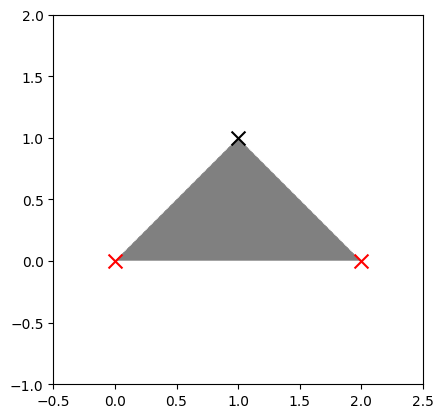

In [72]:
triangle = [0, 0, True, 1, 0, False, -1, 2, False]

grid_x, grid_y = np.meshgrid(np.linspace(-0.5, 2.5, 300), np.linspace(-1, 2, 300))
grid_points = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1)
grid_image = [are_coords_in_triangle(coords, triangle) for coords in grid_points]

plt.imshow(np.reshape(grid_image, (300, 300)), extent=[-0.5, 2.5, -1, 2], origin="lower", cmap="binary", alpha=0.5)
plt.scatter(0, 0, marker='x', s=100, color="black" if are_coords_in_triangle((0, 0), triangle) else "red")
plt.scatter(1, 1, marker='x', s=100, color="black" if are_coords_in_triangle((1, 1), triangle) else "red")
plt.scatter(2, 0, marker='x', s=100, color="black" if are_coords_in_triangle((2, 0), triangle) else "red")
plt.show()

Next, we have to determine the decision boundaries for the sample data given by tiling the feature space.
To simplify the process, the feature space will have a range of \[0, 1\].

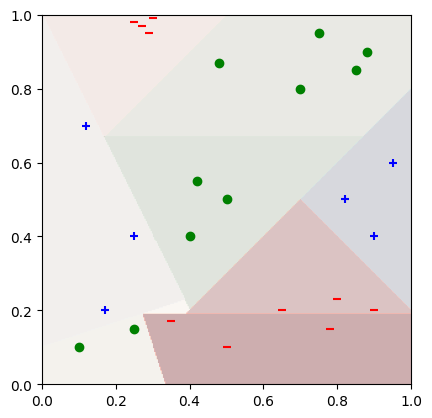

In [73]:
points = [
    [0.1, 0.1, "green", "o"],
    [0.25, 0.15, "green", "o"],
    [0.17, 0.2, "blue", "+"],
    [0.25, 0.4, "blue", "+"],
    [0.12, 0.7, "blue", "+"],
    [0.25, 0.98, "red", "_"],
    [0.27, 0.97, "red", "_"],
    [0.29, 0.95, "red", "_"],
    [0.3, 0.99, "red", "_"],
    [0.4, 0.4, "green", "o"],
    [0.5, 0.5, "green", "o"],
    [0.42, 0.55, "green", "o"],
    [0.48, 0.87, "green", "o"],
    [0.7, 0.8, "green", "o"],
    [0.75, 0.95, "green", "o"],
    [0.85, 0.85, "green", "o"],
    [0.88, 0.9, "green", "o"],
    [0.35, 0.17, "red", "_"],
    [0.5, 0.1, "red", "_"],
    [0.65, 0.2, "red", "_"],
    [0.8, 0.23, "red", "_"],
    [0.9, 0.2, "red", "_"],
    [0.78, 0.15, "red", "_"],
    [0.82, 0.5, "blue", "+"],
    [0.9, 0.4, "blue", "+"],
    [0.95, 0.6, "blue", "+"],
]

tiles = list()
labels = list()

labels.append("Green")
tiles.append([0.0, 0.0, True, 0.33, 0.1, False, -3.0, 1.0, False])
labels.append("Blue")
tiles.append([0.33, 0.1, True, -999, 1.0, True, -2.0, 1.0, False])
labels.append("Red")
tiles.append([-2.0, 1.0, True, 0.0, 1.0, False, 1.0, 0.5, True])
labels.append("Green")
tiles.append([1.0, 0.5, False, 0.0, 0.67, True, 1.0, -0.2, True])
labels.append("Green")
tiles.append([-2.0, 1.0, True, 0.0, 0.67, False, 1.0, -0.2, True])
labels.append("Blue")
tiles.append([1.0, -0.2, False, -1.0, 1.2, True, 999, -999, True])
labels.append("Red")
tiles.append([-1.0, 1.2, False, 1.0, -0.2, False, 0.0, 0.19, True])
labels.append("Red")
tiles.append([-3.0, 1.0, True, 0.0, 0.19, False, 999, -999, True])

for tile, label in zip(tiles, labels):
    grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 300), np.linspace(0, 1, 300))
    grid_points = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1)
    grid_image = [are_coords_in_triangle(coords, tile) for coords in grid_points]

    plt.imshow(np.reshape(grid_image, (300, 300)), extent=[0, 1, 0, 1], cmap=label + "s",
               origin="lower", vmin=0, vmax=1, alpha=0.3)

for point in points:
    plt.scatter(point[0], point[1], color=point[2], marker=point[3])

plt.show()

With these regions in place, we can now turn them into our first layer of the neural network, and use the previously created binary neurons to build our second layer, and create our prediction function.

In [74]:
first_layer = [Neuron(afunc=are_coords_in_triangle, params=tile) for tile in tiles]

red_neuron = Neuron(afunc=masked_or, params=[label == "Red" for label in labels])
green_neuron = Neuron(afunc=masked_or, params=[label == "Green" for label in labels])
blue_neuron = Neuron(afunc=masked_or, params=[label == "Blue" for label in labels])
second_layer = [red_neuron, green_neuron, blue_neuron]

layers = [first_layer, second_layer]

def predict_nn(data, layers):
    '''
    The function predict_nn is responsible for propagating data through a given neural network.
    Inputs:
    data: The input data to the neural network, which is a numpy array or list.
    layers: The list of layers in the neural network, each layer being a list of neurons.
    Output:
    The result of the propagation of data through the neural network, which is a list with the output of each neuron in the last layer.
    '''
    for layer in layers:
        data = [neuron.activate(data) for neuron in layer]
    return data

The network should be able to recreate the labels and decision regions without any errors, meaning we should be able to recreate the previous plot using the network's predictions for coloring alone, and correctly predict the label of every training instance.

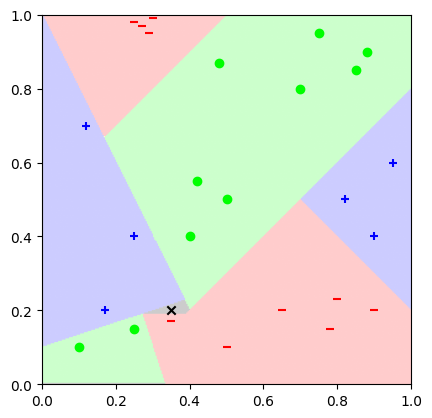

In [75]:
res = 300

def rgba(rgb, a):
    '''
    The function rgba is responsible for converting an RGB color code to RGBA by adding an alpha (transparency) channel.
    Input:
    rgb: The RGB color code, which is a list of three elements.
    a: The value for the alpha (transparency) channel.
    Output:
    The RGBA color code, which is a list of four elements.
    '''
    
    return [rgb[0], rgb[1], rgb[2], a]

def label_to_marker(label):
    '''
    The function label_to_marker is responsible for converting a color label (used in the context of a plot) to a marker symbol.
    Input:
    label: The color label, which is a list of three elements corresponding to an RGB color code.
    Output:
    The marker symbol, which is a string.
    '''
    if label == [1.0, 0.0, 0.0]:
        return "_"
    elif label == [0.0, 1.0, 0.0]:
        return "o"
    elif label == [0.0, 0.0, 1.0]:
        return "+"
    else:
        return "x"

grid_x, grid_y = np.meshgrid(np.linspace(0, 1, res), np.linspace(0, 1, res))
grid_points = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1)
grid_image = [rgba(predict_nn(coords, layers), 0.2) for coords in grid_points]

plt.imshow(np.reshape(grid_image, (res, res, 4)), extent=[0, 1, 0, 1],
           origin="lower", vmin=0, vmax=1)

for point in points:
    label = predict_nn(point[0:2], layers)
    plt.scatter(point[0], point[1], color=label, marker=label_to_marker(label))

label = predict_nn([0.35, 0.2], layers)
plt.scatter(0.35, 0.2, color=label, marker=label_to_marker(label))

plt.show()

As demonstrated, the network is perfectly capable of reproducing the labels of the training data and the decision regions without failure.
The only issue with the presented network is that it can be very challenging to cover the entire input parameter space with the chosen approach of tiling the space into triangles - The small region surrounding the coordinates (0.35, 0.2) (Marked with a black X on the plot), for example, does not have any neurons associated with it, resulting in a (0.0, 0.0, 0.0) prediction and a black shade in the plot.
### Task 1.3: Generalization for higher-dimensional input
The chosen approach heavily relies on the two-dimensionality of input data, as a higher-dimensional variant of the triangle tiling requires much more complex boundary planes instead of simple line equations, which makes it significantly harder to manually set them.

A similar, but easier approach could use n-dimensional spheres instead of triangles, then the generalization for higher-dimensional input would be a lot more manageable, and could even be automated for any training data (Which would effectively result in a nearest-neighbor-like algorithm), allowing the implementation to be much more useful.
Especially the automated implementation would yield a lot more input regions unassociated with any neurons in the first layer though, which would make it even more difficult to predict labels outside of the training set.

Similarly, more complex label distributions make it significantly harder to properly fit neurons onto the training set, which results in a higher total number of neurons, and a huge decrease in runtime, because every neuron in every layer has to execute its activation function for every input data point. With the current (Relatively simple) network, the prediction of the 90k data point used to generate the plot above already took several seconds - although a more streamlined implementation making use of NumPy's array functions could probably help out with this issue, especially with the n-sphere approach.

## Task 2:  Linear Activation Function


For a feed forward network the output of each layer l is calculated iteratively by <br>
$Z_0 = X$ <br>
$Z_l = Z_(l-1) ∙ B_l + b_l …… Eq1$ <br>
$Z_l = ∅_1 (Z_1) …… Eq2$ <br>

Assume that the activation function in each of the hidden layers of a neural network with depth L>1 is the identity function
Let $B_1, B_2, .... B_L$ be the weights of vector of each layer and X represents the input.

As the activation function in each layer is identity function then according to eq1 and eq2, we can write it as

$Z_l= B_L∙(B_(L-1)∙( B_(L-2)...( B_2  ∙(B_1∙X))))$ <br>

This can also be expressed as

$Z_l= B_L∙ B_(L-1)∙ B_(L-1) ... B_2  ∙ B_1∙X$ <br>

Consider

$\hat B_L = B_L∙ B_(L-1)∙ B_(L-1) ... B_2  ∙ B_1∙X .... Eq3$ <br>

Then the eq3 can be written as

$Z_l = B_L^| (X)$ <br>

This holds true even for 1 layer neural network where the output of the network is a linear combination of the input features.

## Task 3: Programming a neural network
In this exercise we want to implement a simple Multi-Layer Perceptron classi
er using numpy. The
python code below de
nes an MLP class with ReLU activations in the hidden layers and softmax
output

This LinearLayer class depicts a neural network's linear (or dense, or completely connected) layer. It transforms its inputs linearly by multiplying them by a weights matrix and adding a bias vector. Backpropagation requires the gradients for the weights and biases, as well as the downstream gradient for the preceding layer, which the backward technique computes. The gradient descent step is applied to the weights and biases using the update method using the computed gradients.

In [76]:
import numpy as np
from sklearn import datasets

In [77]:
class ReLULayer(object):
    def forward(self, input):
        '''
        The function forward is responsible for applying the Rectified Linear Unit (ReLU) operation on the input data.
        input: The input to the layer which is a numpy array
        output:
        The result of applying the ReLU function on the input
        '''
        # remember the input for later backpropagation
        self.input = input
        # return the ReLU of the input
        relu = np.maximum(0,input)
        return relu

    def backward(self, upstream_gradient):
        '''
        The function backward is responsible for computing the derivative of ReLU from the upstream gradient and the stored input.
        Input:
        upstream_gradient: The gradient of the loss function with respect to the output of the ReLU function
        Output:
        The downstream gradient for the next layer
        '''
        # compute the derivative of ReLU from upstream_gradient and the stored input
        grad_relu=self.input>0
        downstream_gradient = upstream_gradient * grad_relu
        return downstream_gradient

    def update(self, learning_rate):
        '''
        The function update is not applicable for the ReLU layer because it does not have any learnable parameters. 
        Hence it is implemented as a pass function.
        Input:
        learning_rate: The learning rate for the gradient update
        Returns:
        None
        '''
        pass # ReLU is parameter-free

####################################

class OutputLayer(object):
    def __init__(self, n_classes):
        self.n_classes = n_classes

    def forward(self, input):
        '''
        The forward function applies the softmax function on the input data.
        Input:
        input: The input to the layer which is a numpy array
        Output:
        The result of applying the softmax function on the input
        '''
        # remember the input for later backpropagation
        self.input = input
        # return the softmax of the input
        e_x = np.exp(input - np.max(input,axis=1,keepdims=True))
        softmax = e_x / e_x.sum(axis=1,keepdims=True)
        return softmax

    def backward(self, predicted_posteriors, true_labels):
        '''
        The backward function computes the loss derivative with respect to the stored inputs using cross-entropy loss 
        and the chain rule for softmax.
        Input:
        predicted_posteriors: The predicted probabilities for each class from the forward pass
        true_labels: The actual labels for the data
        Output:
        The downstream gradient for the next layer
        '''
        # return the loss derivative with respect to the stored inputs
        # (use cross-entropy loss and the chain rule for softmax,
        #  as derived in the lecture)
        num_units = predicted_posteriors.shape[1]
        d_layer = np.eye(num_units)
        downstream_gradient = np.dot(true_labels, d_layer) #chain rule
        return downstream_gradient

    def update(self, learning_rate):
        '''
        The function update is not applicable for the softmax layer because it does not have any learnable parameters. 
        Hence it is implemented as a pass function.
        Input:
        learning_rate: The learning rate for the gradient update
        Output:
        None
        '''
        pass # softmax is parameter-free

In [78]:
class LinearLayer(object):
    # Initialization function
    def __init__(self, n_inputs, n_outputs):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        # Randomly initialize weights (B) and biases (b)
        # Here, the weights matrix B has a size of (n_inputs, n_outputs)
        # and the biases vector b has a size of (n_outputs,)
        self.B = np.random.normal(size=(n_inputs, n_outputs))
        self.b = np.random.normal(size=(n_outputs,))

    # Forward pass function
    def forward(self, input):
        """
        Perform the forward pass of the linear layer.
        Inputs:
        :param  A 2D numpy array where each row is a sample and each column is a feature.
        Output:
        :returns: A 2D numpy array where each row is a sample and each column is a preactivation.
        """
        # Remember the input for later backpropagation
        self.input = input
        # Compute the linear transformation of input using weights and biases
        # This is the preactivation for the subsequent non-linear layer
        preactivations = np.dot(input, self.B) + self.b
        return preactivations

    # Backward pass function
    def backward(self, upstream_gradient):
        '''
         Inputs:
        - upstream_gradient: array of shape (batch_size, n_outputs)
          Gradient of the loss with respect to the outputs of this layer.

        Returns:
        - downstream_gradient: array of shape (batch_size, n_inputs)
          Gradient of the loss with respect to the inputs to this layer.
        '''
        # Compute the gradient of the biases
        # It's simply the sum of upstream gradients across the batch dimension
        self.grad_b = np.sum(upstream_gradient, axis=0)
        # Compute the gradient of the weights
        # It's the input transposed times the upstream gradient
        self.grad_B = np.dot(self.input.T, upstream_gradient)
        # Compute the downstream gradient to be passed to the preceding layer
        # It's the upstream gradient times the weights transposed
        downstream_gradient = np.dot(upstream_gradient, self.B.T)
        return downstream_gradient

    # Update function
    def update(self, learning_rate):
        ''' 
          Performs a gradient descent update of the weights and biases.

        Inputs:
        - learning_rate: float, learning rate for the gradient update.
        '''
        # Update the weights and biases by batch gradient descent
        # Here we subtract because we want to move opposite to the gradient for minimizing the loss
        self.B = self.B - learning_rate * self.grad_B
        self.b = self.b - learning_rate * self.grad_b


In [79]:
class MLP(object):
    # Initialization function
    def __init__(self, n_features, layer_sizes):
        # Construct a multi-layer perceptron with ReLU activation in the hidden layers and softmax output
        self.n_layers = len(layer_sizes)
        self.layers = []
        n_in = n_features
        for n_out in layer_sizes[:-1]:
            # Add Linear layer followed by a ReLU layer
            self.layers.append(LinearLayer(n_in, n_out))
            self.layers.append(ReLULayer())
            n_in = n_out

        # Create last linear layer + output layer
        n_out = layer_sizes[-1]
        self.layers.append(LinearLayer(n_in, n_out))
        self.layers.append(OutputLayer(n_out))

    # Forward pass function
    def forward(self, X):
        '''The forward function is a key component of a neural network model, as it carries out the computations of the network from the input layer all the way to the output layer.
        input:The input X is a 2-dimensional numpy array where each row corresponds to an instance in the current mini-batch of input data.
        output:The output of the forward function is another 2-dimensional numpy array of the same shape as the input.
        '''
        # X is a mini-batch of instances
        batch_size = X.shape[0]
        # Flatten the other dimensions of X (in case instances are images)
        X = X.reshape(batch_size, -1)

        # Compute the forward pass
        result = X
        for layer in self.layers:
            result = layer.forward(result)
        return result

    # Backward pass function
    def backward(self, predicted_posteriors, true_classes):
        '''This function specifically computes the gradient of the loss function with respect to the weights and biases in the network.
        Inputs:
        - predicted_posteriors: It's a 2D array with shape (batch_size, n_classes).[predicted probabilities for each class for each instance in the batch.]
        - true_classes:One-hot encoded 2d array with shape (batch_size, n_classes).[These are the true labels for each instance in the batch.]
        '''
        downstream_gradient = predicted_posteriors - true_classes # cross-entropy loss derivative
        for layer in reversed(self.layers[:-1]): # Exclude last layer which is OutputLayer
            downstream_gradient = layer.backward(downstream_gradient)
    # Handle OutputLayer separately
        self.layers[-1].backward(predicted_posteriors, true_classes)

    # Update function
    def update(self, X, Y, learning_rate):
        ''' The update function is responsible for performing one step of training, which includes forward propagation, backward propagation, and updating the weights and biases of the network.
        Inputs:
        - X: A batch of input data.  A numpy array
        - Y: The true labels corresponding to the input data X. A numpy array
        - learning_rate :This is a hyperparameter that determines the step size when updating the weights during backpropagation.
        '''
        # Compute the forward pass
        posteriors = self.forward(X)
        # Perform the backward pass
        self.backward(posteriors, Y)
        # Update parameters for each layer
        for layer in self.layers:
            layer.update(learning_rate)

    # Training function
    def train(self, x, y, n_epochs, batch_size, learning_rate):
        """
        Trains the MLP using mini-batch gradient descent.

        Inputs:
        - x: A numpy array of shape (N, D) giving training data, where N is the number of data points and D is the number of features.
        - y: A numpy array of shape (N, C) giving training labels, where C is the number of classes. Labels should be one-hot encoded.
        - n_epochs: An integer giving the number of training epochs (how many times the learning algorithm will work through the entire training set).
        - batch_size: An integer giving the number of training examples per mini-batch.
        - learning_rate: A float giving the learning rate for the optimization.

        Returns: No explicit return, but the weights and biases of the MLP are updated internally.
        """
        N = len(x)
        n_batches = N // batch_size
        for i in range(n_epochs):
            # Reorder data for every epoch
            permutation = np.random.permutation(N)

            for batch in range(n_batches):
                # Create mini-batch
                start = batch * batch_size
                x_batch = x[permutation[start:start+batch_size]]
                y_batch = y[permutation[start:start+batch_size]]

                # Perform one forward and backward pass and update network parameters
                self.update(x_batch, y_batch, learning_rate)
    @staticmethod
    def to_one_hot(Y, n_classes):
        ''' The to_one_hot function is a utility function that converts class labels into a one-hot encoded representation.
        Input:
        Y: a 1-D numpy array of size n_samples containing class labels. Each label is an integer between 0 and n_classes-1.
        n_classes: the number of unique classes, a scalar integer.
        Output:
        A 2-D numpy array of shape (n_samples, n_classes). 
        '''
        n_samples = len(Y)
        Y_one_hot = np.zeros((n_samples, n_classes))
        Y_one_hot[np.arange(n_samples), Y] = 1
        return Y_one_hot


In [80]:

if __name__=="__main__":

    # set training/test set size
    N = 2000

    # create training and test data
    X_train, Y_train = datasets.make_moons(N, noise=0.05)
    X_test,  Y_test  = datasets.make_moons(N, noise=0.05)
    n_features = 2
    n_classes  = 2

    # standardize features to be in [-1, 1]
    offset  = X_train.min(axis=0)
    scaling = X_train.max(axis=0) - offset
    X_train = ((X_train - offset) / scaling - 0.5) * 2.0
    X_test  = ((X_test  - offset) / scaling - 0.5) * 2.0

    # set hyperparameters (play with these!)
    layer_sizes = [5, 5, n_classes]
    n_epochs = 5
    batch_size = 200
    learning_rate = 0.05

    # create network
    network = MLP(n_features, layer_sizes)

    # train
    network.train(X_train, MLP.to_one_hot(Y_train, n_classes), n_epochs, batch_size, learning_rate)

    # test
    predicted_posteriors = network.forward(X_test)
    # determine class predictions from posteriors by winner-takes-all rule
    predicted_classes = np.argmax(predicted_posteriors, axis=1)
    # compute and output the error rate of predicted_classes
    error_rate = np.mean(predicted_classes != np.argmax(MLP.to_one_hot(Y_test, n_classes), axis=1))
    print("error rate:", error_rate)


error rate: 0.5
